In [1]:
!pip install vegas

  Using cached vegas-5.4.2-cp310-cp310-linux_x86_64.whl
  Using cached gvar-11.11.13-cp310-cp310-linux_x86_64.whl


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import vegas
seed = 7654
np.random.default_rng(seed)

Generator(PCG64) at 0x7FE026789EE0

In [2]:
# defining all the constants

pi = np.pi

qed_coupling = 1/129

qcd_coupling = 0.118

zboson_mass = 91.2

zboson_decaywidth = 2.5

weinberg_angle = 0.223

electron_charge = -1

upquark_charge = 2/3

downquark_charge = -1/3

upquark_isospin = 1/2

downquark_isospin = -1/2

number_of_quark_flavours = 5

number_of_qcd_colours = 3

conversion_factor = 3.89379656*10**8

kappa = 1/(4*weinberg_angle*(1-weinberg_angle))

electron_vectorcoupling = downquark_isospin - 2* electron_charge*weinberg_angle

upquark_vectorcoupling = upquark_isospin - 2* upquark_charge*weinberg_angle

downquark_vectorcoupling= downquark_isospin - 2* downquark_charge*weinberg_angle

gev2_to_pb_conversion = 2.56819*10**(-9)

In [3]:
uniform_distribution = 1/((zboson_mass + 3*zboson_decaywidth)**2-(zboson_mass - 3*zboson_decaywidth)**2)

def chi_1(s): 

    return kappa* (s*(s- zboson_mass**2))/((s- zboson_mass**2)**2 + zboson_decaywidth**2 * zboson_mass**2)

def chi_2(s):

    return kappa**2 * (s**2)/((s- zboson_mass**2)**2 + zboson_decaywidth**2 * zboson_mass**2)
    
#defining the matrix element e^+ e^- --> qq

def matrix_element(s,cos_theta,quark_flavour):

    if (quark_flavour == 2 or quark_flavour ==5): 
        return (4*pi*qed_coupling)**2 * number_of_qcd_colours* ((1+ cos_theta**2)*(electron_charge**2*upquark_charge**2 + 2* electron_charge * upquark_charge* electron_vectorcoupling * upquark_vectorcoupling * chi_1(s) + (downquark_isospin**2+ electron_vectorcoupling**2)*(upquark_isospin**2 + upquark_vectorcoupling**2)*chi_2(s))+ cos_theta* (4* electron_charge*upquark_charge*downquark_isospin*upquark_isospin*chi_1(s)+ 8* downquark_isospin*electron_vectorcoupling* upquark_isospin* upquark_vectorcoupling*chi_2(s)))
    
    else:  
        return (4*pi*qed_coupling)**2 * number_of_qcd_colours* ((1+ cos_theta**2)*(electron_charge**2*downquark_charge**2 + 2* electron_charge * downquark_charge* electron_vectorcoupling * downquark_vectorcoupling * chi_1(s) + (downquark_isospin**2+ electron_vectorcoupling**2)*(downquark_isospin**2 + downquark_vectorcoupling**2)*chi_2(s))+ cos_theta* (4* electron_charge*downquark_charge*downquark_isospin*downquark_isospin*chi_1(s)+ 8* downquark_isospin*electron_vectorcoupling* downquark_isospin* downquark_vectorcoupling*chi_2(s)))

def differential_cross_section(x):

    summed_matrix_elements = 0
    
    for i in range(number_of_quark_flavours):
    
        quark_flavour = i+1
        
        summed_matrix_elements = summed_matrix_elements + matrix_element(x[0],x[1],quark_flavour)
    
    return conversion_factor *uniform_distribution* 1/(8*pi) *1/(4*pi) * 1/(2*x[0]) *summed_matrix_elements

In [4]:
#vegas integrator
s_lowlimit = (zboson_mass - 3*zboson_decaywidth)**2
s_uplimit  = (zboson_mass + 3*zboson_decaywidth)**2

limits = vegas.AdaptiveMap([[s_lowlimit,s_uplimit], [-1,1],[0,2*pi]], ninc=5)#[[s_lowlimit,s_uplimit],[-1,1],[0,2*pi]]

vegas_integrator = vegas.Integrator(limits)

integration_values_1e = vegas_integrator(differential_cross_section, nitn=10, neval=1000)

print(integration_values_1e.summary())

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   9799(169)       9799(169)           0.00     1.00
  2   9901(104)       9873(89)            0.27     0.61
  3   9976(81)        9929(60)            0.50     0.61
  4   9884(70)        9910(45)            0.41     0.75
  5   9951(60)        9925(36)            0.38     0.82
  6   10047(48)       9970(29)            1.13     0.34
  7   9888(41)        9943(24)            1.38     0.22
  8   9931(37)        9940(20)            1.19     0.30
  9   9891(32)        9926(17)            1.26     0.26
 10   9890(27)        9916(14)            1.26     0.25



In [5]:
s_lowlimit = (zboson_mass - 3*zboson_decaywidth)**2
s_uplimit  = (zboson_mass + 3*zboson_decaywidth)**2

#limits = [[s_lowlimit,s_uplimit],[-1,1],[0,2*pi]]
low_limits = np.array([s_lowlimit,-1,0])

up_limits = np.array([s_uplimit,1,2*pi])

map = vegas.AdaptiveMap([[s_lowlimit,s_uplimit], [-1,1],[0,2*pi]],ninc=100)

In [6]:
x = np.random.uniform(low_limits, up_limits,size=(1000,3))


function_values = []
for i in x:
    function_values.append(differential_cross_section(i))
                           
map.adapt_to_samples(x, function_values, nitn=10)

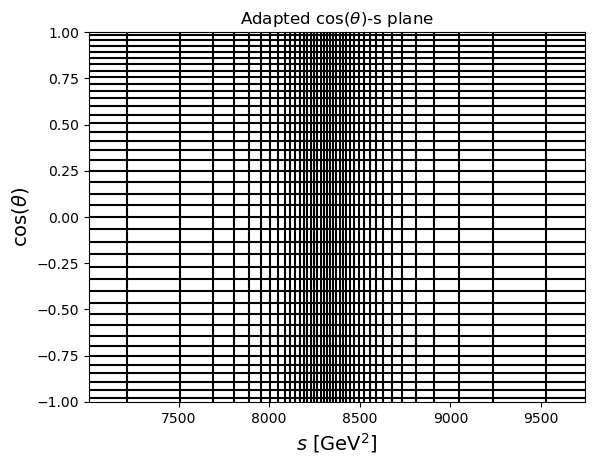

In [17]:
fig01 = map.show_grid(axes=[[0,1]],plotter=plt)



fig01.xlabel(r'$s$ [GeV$^2$]',fontsize= 14)
fig01.ylabel(r'$\cos(\theta)$',fontsize= 14)
fig01.title(r'Adapted $\cos(\theta)$-s plane')

plt.savefig('cos_s_plane.png',dpi=400)

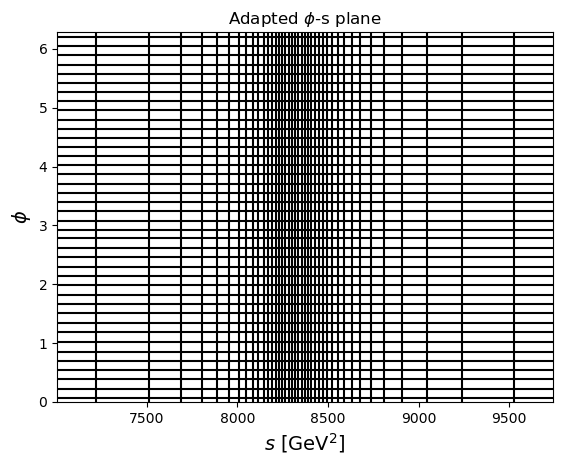

In [18]:
fig02 = map.show_grid(axes=[[0,2]],plotter=plt)
fig02.xlabel(r'$s$ [GeV$^2$]',fontsize= 14)
fig02.ylabel(r'$\phi$',fontsize= 14)
fig02.title(r'Adapted $\phi$-s plane')
plt.savefig('phi_s_plane.png',dpi=400)

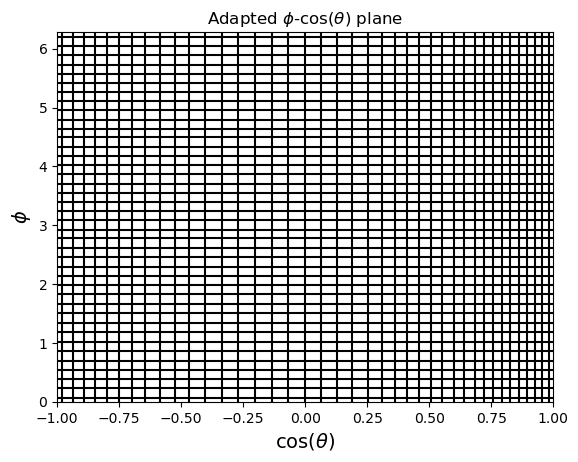

In [16]:
fig12 = map.show_grid(axes=[[1,2]],plotter=plt)
fig12.xlabel(r'$\cos(\theta)$',fontsize= 14)
fig12.ylabel(r'$\phi$',fontsize= 14)
fig12.title(r'Adapted $\phi$-$\cos(\theta)$ plane')
plt.savefig('phi_cos_plane.png',dpi=400)